#                        Visualizing Asteroids & Meteorites Impact Data
[Final Submission]
- Shubham Parmar
- Aman Sharma
- Ayshwarya Singh
- Hinmanshi Chaudhary
- Parth Lawania

In this project, we will examine two types of NASA data (meteorites and astroids) taken from the following site: https://www.kaggle.com/nasa/datasets. We analyze NASA asteroid
and meteorite data to visualize where impacts have occurred on Earth, and if more will occur
in the future.

In [1]:
#Importing the dependecies 
#!conda install --yes basemap 
#!conda update --yes pandas
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

# Meteorite Data

The first data consists of meteorites which have struck Earth. We used a csv file from https://www.kaggle.com/nasa/meteorite-landings and uploaded the csv file into jupyter notebook in order to construct a dataframe useful for plotting. 

A meteorite is a piece of iron, stone, or stony-iron composite that has fallen to Earth from outer space.

In [2]:
# Loading the file
file = "meteorite-landings.csv"

# Reading the meteor csv data file 
meteor = pd.read_csv(file)


# Displaying the data table for preview
meteor.head(5)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
meteor = meteor.rename(columns ={"recclass": "type", "fall": "discovery", "nametype": "appearance", "reclat": "lat", "reclong": "long", "GeoLocation": "coordinates"})

meteor.head()

,name,id,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
#Dropping some unecessary columns 
meteor = meteor.drop(columns=["id", "coordinates"])
meteor.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [5]:
meteor_count = meteor["year"].value_counts()
meteor_count.head()

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
Name: year, dtype: int64

In [6]:
# Remove the rows with missing data
clean_meteor_df = meteor.dropna(how="any")
clean_meteor_df.count()

name          38116
appearance    38116
type          38116
mass          38116
discovery     38116
year          38116
lat           38116
long          38116
dtype: int64

In [7]:
clean_meteor_df.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


**name** = Named after the location on Earth<br/>
**appearance** = Named after the location on Earth<br/>
**type** = chemical composition<br/>
**mass** = grams<br/>
**discovery** = how was it found?<br/>
**year** = when was the meteorite found?<br/>

In [8]:
n_types = meteor['type'].unique().size
print(f'There are {n_types} unique meteor types.')

There are 466 unique meteor types.


In [9]:
# Using GroupBy in order to separate the data into fields according to "state" values# Using  
grouped_meteor_df = meteor.groupby(['year'])

# In order to be visualized, a data function must be used...
#grouped_meteor_df.head(5)

In the 1700's there were only large meteorites discovered with mass of about 103 - 105 grams or between 2 - 220 lbs. The majority of the meteorites (giant cluster of dots in the center) are heavy meteorites.

/home/dante/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Meteorite Mass (grams) vs. Year')

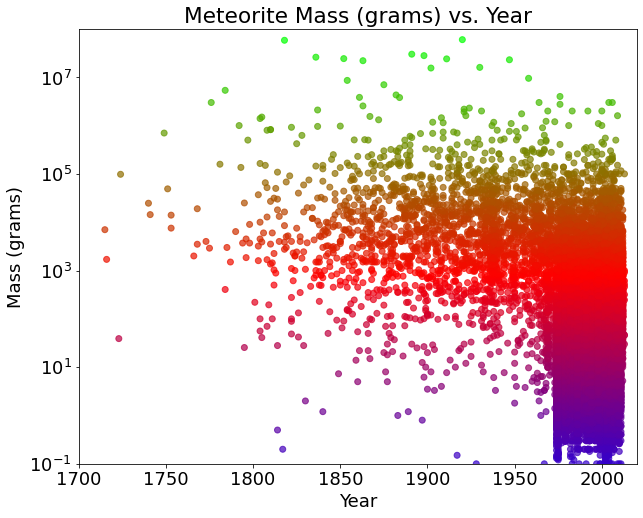

In [10]:
x = meteor['year']
y = meteor['mass']
fig = plt.figure(figsize=(10,8))

plt.scatter(x, y, c=np.log10(y), cmap=plt.cm.brg, alpha=0.7)
plt.ylim([0.1,1e8])
plt.xlim([1700,2020])
plt.yscale('log')

plt.xlabel("Year")
plt.ylabel("Mass (grams)")
plt.title("Meteorite Mass (grams) vs. Year")


Text(0.5, 1.0, 'Full Disk Orthographic Projection')

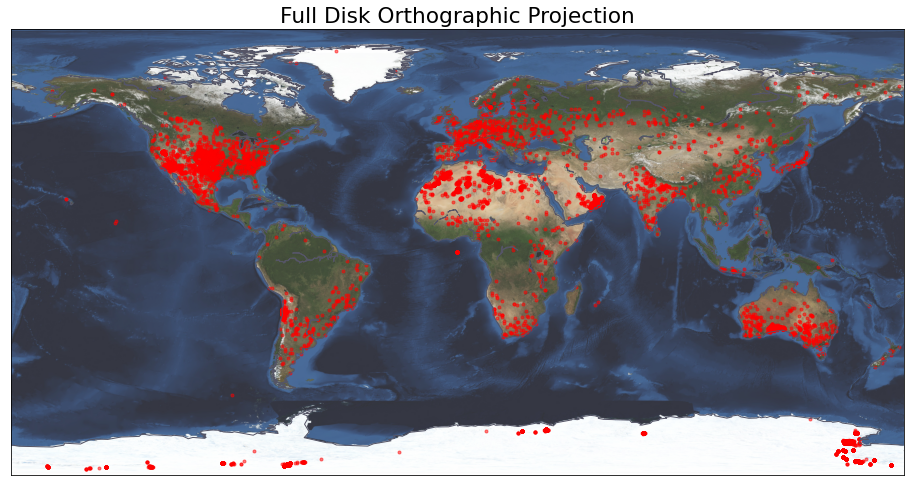

In [11]:
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(meteor['long'], meteor['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Orthographic Projection")

Text(0.5, 1.0, 'Meteor Type Martian (nakhlite)')

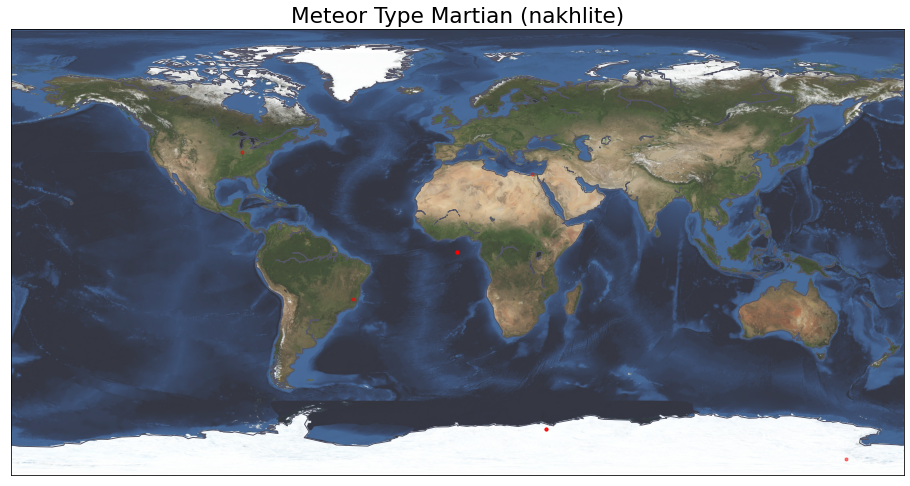

In [12]:
# Look at one specific type
meteor_type = "Martian (nakhlite)"
L5 = meteor.loc[meteor['type'] == meteor_type]
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(L5['long'], L5['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title(f"Meteor Type {meteor_type}")

The plot above with the very few red dots is showing all the Martian meteorites. We made this by plotting all the data which contained a rock type from Mars which was included in our data. 

In [ ]:
def get_discovery_color(discovery):
    if discovery == 'Fell':
        return 'Green'
    elif discovery == 'Found':
        return 'Red'
    else:
        return 'Gold'

lat = clean_meteor_df['lat'].values
lon = clean_meteor_df['long'].values
mass = clean_meteor_df['mass'].values

discovery_type_list = clean_meteor_df['discovery']
discovery_color_list = [get_discovery_color(discovery_type) for discovery_type in discovery_type_list]

fig = plt.figure(figsize=(16,11))
m = Basemap()
m.shadedrelief()

m.scatter(lon, lat, #latlon=True,
          c=discovery_color_list, s=mass/20000,
          alpha=0.5, marker="o", edgecolors="black")

plt.title("Meteorites Impacts by Mass")
#plt.savefig("../meteorites_impact_by_mass.png")

Text(0.5, 1.0, 'Meteorites Impacts by Mass')

# Asteroid Data

Asteroids are rocky worlds revolving around the sun that are too small to be called planets.

In [ ]:
# Loading the file
file = "impacts.csv"

# Reading the meteor csv data file 
asteroid_impacts = pd.read_csv(file)


# Displaying the data table for preview
asteroid_impacts.head(10)


**Period Start** = Tracking period in years<br/>
**Possible Impacts** = Number of ways it can get close to Earth.<br/>
**Cumulative Impact Probability** = Probability of hitting Earth during the entire period<br/>
**Asteroid Velocity** = km / s<br/>
**Asteroid Magnitude** = brightness of asteroid<br/>
**Cumulative Palermo Scale** = Positive is high risk<br/>
**Maximum Torino Scale** = 0 = no risk; 2-4 = some; $>$5 = High Risk<br/>


In [ ]:
asteroid = asteroid_impacts.rename(columns ={"Object Name": "Asteroid_Name"})
#asteroid.head()


In [ ]:
#Dropping some unecessary columns #Droppin 
asteroids = asteroid.drop(columns = ["Maximum Torino Scale", "Asteroid Magnitude"])
#asteroids

The following plot is a histogram which bins the data and counts how many asteroids are in each bin. The x-axis is the cumulative impact probability as a percentage. This means the overall probability that the asteroid will strike Earth. The y-axis is the number of asteroids which have that probability of hitting Earth. 

The danger zone corresponds to the percentage which is worrisome for a potential collision. From the plot, we can conclude that there is a low percentage of asteroids striking Earth.

In [ ]:
fig = plt.figure(figsize=(10,8))

x = asteroids['Cumulative Impact Probability']
_ = plt.hist(np.log10(x), bins=20, edgecolor='black', alpha=0.5)
plt.axvline(-3, linestyle='--', color='black')
plt.xticks([-8,-6,-4,-2,0],[r'10$^{-8}$%', '10$^{-6}$%','10$^{-4}$%', '0.01%', '1%'])
plt.xlabel("Cumulative Impact Probability (%)")
plt.ylabel("No. of Asteroids")
plt.text(-2.8, 40,"Danger Zone")
plt.title("Number of Asteroids with Impact Probability")

This scatter plot shows the probability of impacts from asteroids based on their size.

The larger asteroids have a lower probability of colliding with Earth, and there are fewer of them left. Most have already hit something!

In [ ]:
x = np.log10(asteroids["Cumulative Impact Probability"]*100)
y_ = asteroids["Asteroid Diameter (km)"]
y = np.log10(y_)

fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, s=y_*1000, alpha=0.5)
plt.xticks([-8,-6,-4,-2,0],[r'10$^{-8}$%', '10$^{-6}$%','10$^{-4}$%', '0.01%', '1%'])
plt.yticks([-2,-1,0],["0.01","0.1","1"])
plt.xlabel("Cumulative Impact Probability (%)")
plt.ylabel("Asteroid Diameter (km)")
plt.title("Impact Probability Based on Asteroid Size")
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)
x = np.log10(asteroids['Cumulative Impact Probability'])
y = asteroids['Cumulative Palermo Scale']
_ = plt.hist2d(x,y, bins=50, figure=fig, cmap=plt.cm.cubehelix)
plt.colorbar()
plt.xlabel('Cumulative Impact Probability')
plt.ylabel('Cumulative Palermo Scale')
plt.title("Palermo Scale vs. Impact Probability")

This 2D density plot above says that there are x-number of asteroids for each combination of impact probability and Palermo scale, where x refers to the color bar value.

The positive slope shows that the higher the impact probability, the higher the risk of damage.

<u>Palermo Scale</u><br/>
-2 = normal<br/>
$n>0$ = high risk of impact

How we made the plot:<br/>
https://python-graph-gallery.com/85-density-plot-with-matplotlib/

In [ ]:
def impact_score(impact):
    if impact < -8:
        return 'darkmagenta'
    elif impact < -4:
        return 'LightBlue'
    else:
        return 'red'
    
def asteroid_scale(scale):
    return (scale) * -100;
  

x = asteroids['Possible Impacts']
y = asteroids['Period Start']
z = asteroids['Maximum Palermo Scale']

asteroids_list = asteroids['Maximum Palermo Scale']
asteroids_list_colors = [impact_score(impact) for impact in asteroids_list]

asteroids_scale_list= [asteroid_scale(scale) for scale in asteroids_list]

fig = plt.figure(figsize=(10,8))
plt.ylim(2016,2030)
plt.xlim(-10,100)
plt.scatter(x, y, s=asteroids_scale_list , c=asteroids_list_colors, alpha=0.6, marker="o", edgecolors="black")

plt.title("Possible Future Impacts")
plt.xlabel("Possible Impacts")
plt.ylabel("Years")
plt.grid(True)

# plt.savefig("../possible_impacts_asteroids.png")
plt.show() 

The plot above shows the number of ways the asteroids in our data can get close to Earth within the tracking period.

Dark Magenta shows least possibility to enter earth in that year and red marker shows higher chance than other two.